In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [10]:
"""
    Loads data from a csv file
"""
def load_data(filename):
    df = pd.read_csv(filename, header=None)
    return df

In [52]:
"""
    Preprocess the training data
"""
def preprocess_data(df):
    # Extract the predicted values from the dataset and replace '3' by '1' and '5' by '-1'
    Y_actual=(np.where(df.iloc[:,0]==3,1,-1))
    Y = Y_actual.reshape((len(Y_actual),1)) 
    # Extract the training data inputs from the dataset, append a bias term and assign it to X
    X = np.column_stack([np.ones((df.shape[0],1)).astype(float), df.values[:,1:]])
    return X, Y

In [19]:
"""
    Training linear classifier using online perceptron to fetch w
"""
def train_online_perceptron(dataset, actual, epoch):
    t_in = time.time()
    w = np.zeros((1, dataset.shape[1]))
    
    W = np.zeros((epoch, dataset.shape[1]))
    
    loss = np.zeros((epoch))
    
    for iter in range(epoch):
        error_iter=0.0
        
        for index in range(len(actual)):
            
            x = dataset[index]
            y = actual[index]
            activation = np.sign(np.dot(w, np.transpose(x)))
            cur_g = activation * y
            
            if (cur_g <= 0):
                w = w + y * x
                error_iter -= cur_g
        loss[iter] = error_iter   
        W[iter,:] = w 
    print('Total training time: ', time.time()-t_in)
    return W 

In [45]:
'''
    Predict output
'''
def predict_output(X, W):
    return np.where(np.matmul(X, W) > 0, 1, -1)

In [64]:
'''
    Calculate accuracy
'''
def calculate_accuracy(Y_actual, Y_pred):
    pred_actual = np.hstack((Y_actual, Y_pred))
    result = np.product(pred_actual, axis = 1)
    return np.sum(result > 0) / len(Y_actual) * 100

In [54]:
# Load training and validation data
df_train = load_data('pa2_train.csv')
X_train, Y_train = preprocess_train_data(df_train)
df_val = load_data('pa2_valid.csv')
X_val, Y_val = preprocess_train_data(df_val)

In [44]:
epochs = 15
Trained_W = train_online_perceptron(X_train, Y_train, epochs)
print(Trained_W)   

Total training time:  0.9335055351257324
[[ -23.    0.    0. ...    0.    0.    0.]
 [ -39.    0.    0. ...    0.    0.    0.]
 [ -61.    0.    0. ...    0.    0.    0.]
 ...
 [-182.    0.    0. ...    0.    0.    0.]
 [-191.    0.    0. ...    0.    0.    0.]
 [-202.    0.    0. ...    0.    0.    0.]]


Train accuracies:  [94.74222586 95.76513912 94.98772504 96.4811784  95.68330606 95.76513912
 95.88788871 95.66284779 95.90834697 96.21522095 96.21522095 95.90834697
 96.46072013 96.62438625 95.64238953]
Validation accuracies:  [93.37016575 94.53652548 93.49294045 94.84346225 93.67710252 94.35236341
 93.79987723 93.86126458 94.78207489 93.92265193 94.04542664 94.29097606
 94.2295887  95.27317373 94.59791283]


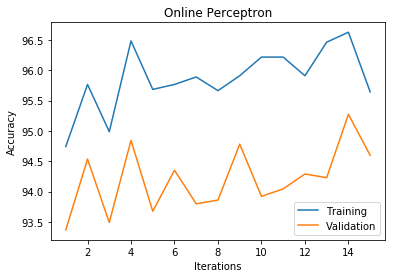

In [65]:
train_accuracy = np.zeros(epochs)
val_accuracy = np.zeros(epochs)

for epoch_no in range(epochs):
    Y_pred = predict_output(X_train, Trained_W[epoch_no].reshape(len(Trained_W[epoch_no]), 1))
    train_accuracy[epoch_no] = calculate_accuracy(Y_train, Y_pred)
    Y_val_pred = predict_output(X_val, Trained_W[epoch_no].reshape(len(Trained_W[epoch_no]), 1))
    val_accuracy[epoch_no] = calculate_accuracy(Y_val, Y_val_pred)

print('Train accuracies: ', train_accuracy)
print('Validation accuracies: ', val_accuracy)
plt.plot(range(1, epochs+1), train_accuracy, label="Training")
plt.plot(range(1, epochs+1), val_accuracy, label="Validation")
plt.title('Online Perceptron')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
# Predict output on test data
test_df = pd.read_csv('pa2_test_no_label.csv', header=None)
X_test = np.column_stack([np.ones((test_df.shape[0],1)).astype(float), test_df.values[:,:]])
online_pred = predict_output(X_test, Trained_W[13,:])
np.savetxt("oplabel.csv", online_pred, fmt = "%i", delimiter = ",")